In [1]:
!unzip "test.zip" -d hand_gesture_dataset


Streaming output truncated to the last 5000 lines.
 extracting: hand_gesture_dataset/test/11/1116.jpg  
 extracting: hand_gesture_dataset/test/11/1117.jpg  
 extracting: hand_gesture_dataset/test/11/1118.jpg  
 extracting: hand_gesture_dataset/test/11/1119.jpg  
 extracting: hand_gesture_dataset/test/11/1120.jpg  
 extracting: hand_gesture_dataset/test/11/1121.jpg  
 extracting: hand_gesture_dataset/test/11/1122.jpg  
 extracting: hand_gesture_dataset/test/11/1123.jpg  
 extracting: hand_gesture_dataset/test/11/1124.jpg  
 extracting: hand_gesture_dataset/test/11/1125.jpg  
 extracting: hand_gesture_dataset/test/11/1126.jpg  
 extracting: hand_gesture_dataset/test/11/1127.jpg  
 extracting: hand_gesture_dataset/test/11/1128.jpg  
 extracting: hand_gesture_dataset/test/11/1129.jpg  
 extracting: hand_gesture_dataset/test/11/1130.jpg  
 extracting: hand_gesture_dataset/test/11/1131.jpg  
 extracting: hand_gesture_dataset/test/11/1132.jpg  
 extracting: hand_gesture_dataset/test/11/1133.j

In [2]:
import os

# Check the structure of the dataset
for root, dirs, files in os.walk("hand_gesture_dataset"):
    level = root.replace("hand_gesture_dataset", "").count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 4 * (level + 1)
    for f in files[:3]:  # show first 3 files per folder
        print(f"{subindent}{f}")


hand_gesture_dataset/
    test/
        10/
            1145.jpg
            985.jpg
            1063.jpg
        15/
            1145.jpg
            985.jpg
            1063.jpg
        8/
            1145.jpg
            985.jpg
            1063.jpg
        9/
            1145.jpg
            985.jpg
            1063.jpg
        3/
            1145.jpg
            985.jpg
            1063.jpg
        13/
            1145.jpg
            985.jpg
            1063.jpg
        1/
            1145.jpg
            985.jpg
            1063.jpg
        12/
            1145.jpg
            985.jpg
            1063.jpg
        5/
            1145.jpg
            985.jpg
            1063.jpg
        14/
            1145.jpg
            985.jpg
            1063.jpg
        6/
            1145.jpg
            985.jpg
            1063.jpg
        17/
            1145.jpg
            985.jpg
            1063.jpg
        0/
            1145.jpg
            985.jpg
            1063.jpg
        7/
  

In [9]:
import os

for root, dirs, files in os.walk("test"):
    level = root.replace("test", "").count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 4 * (level + 1)
    for f in files[:3]:  # show only first 3 files per folder
        print(f"{subindent}{f}")


In [10]:
import os
os.listdir()


['.config', 'test.zip', 'hand_gesture_dataset', 'sample_data']

In [11]:
import os
os.listdir("hand_gesture_dataset")


['test']

In [12]:
import os
os.listdir("hand_gesture_dataset/test")


['10',
 '15',
 '8',
 '9',
 '3',
 '13',
 '1',
 '12',
 '5',
 '14',
 '6',
 '17',
 '0',
 '7',
 '4',
 '18',
 '19',
 '2',
 '11',
 '16']

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os

# Image size and batch setup
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Automatically split dataset into training (80%) and validation (20%)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training data
train_data = datagen.flow_from_directory(
    'hand_gesture_dataset/test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Validation data
val_data = datagen.flow_from_directory(
    'hand_gesture_dataset/test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

# Save trained model
model.save("hand_gesture_model.h5")

print("✅ Model training completed and saved successfully!")


Found 4800 images belonging to 20 classes.
Found 1200 images belonging to 20 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 145s 952ms/step - accuracy: 0.7966 - loss: 0.7313 - val_accuracy: 1.0000 - val_loss: 9.8107e-07
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 201s 948ms/step - accuracy: 0.9954 - loss: 0.0128 - val_accuracy: 1.0000 - val_loss: 2.3662e-07
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 200s 939ms/step - accuracy: 0.9969 - loss: 0.0092 - val_accuracy: 1.0000 - val_loss: 8.5433e-09
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 138s 920ms/step - accuracy: 0.9996 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 8.9306e-08
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 140s 931ms/step - accuracy: 0.9975 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 3.9736e-10
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 138s 920ms/step - accuracy: 0.9952 - loss: 0.0157 - val_accuracy: 1.0000 - val_loss: 8.3707e-05
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 139s 928ms/step - accuracy: 0.9987 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 2.1855e-09
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 136s 907

✅ Model training completed and saved successfully!


In [15]:
import os
os.listdir("/content/hand_gesture_dataset/test/0")[:10]


['1145.jpg',
 '985.jpg',
 '1063.jpg',
 '1028.jpg',
 '943.jpg',
 '1114.jpg',
 '927.jpg',
 '1036.jpg',
 '1105.jpg',
 '906.jpg']

In [16]:
img_path = "/content/hand_gesture_dataset/test/0/001.jpg"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


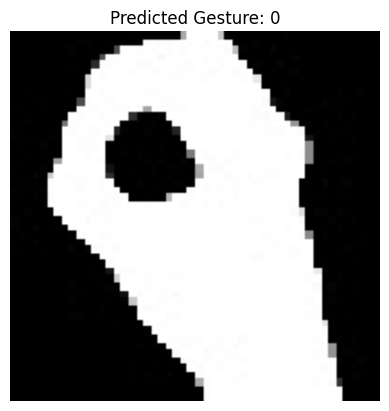

In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf

model = tf.keras.models.load_model("hand_gesture_model.h5")

img_path = "/content/hand_gesture_dataset/test/0/1145.jpg"  # 👈 use the correct file name you saw

img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Gesture: {predicted_class}")
plt.show()